### Setting Up Libraries & Import

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.duplicated().sum()

418

### Text Preprocessing

In [11]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HMT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Step 1: Convert all values in the DataFrame to lowercase
df = df.apply(lambda x: x.astype(str).str.lower())

# Step 2: Remove HTML tags from the 'review' column
df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# Step 3: Remove square brackets and their content
df['review'] = df['review'].apply(lambda x: re.sub(r'\[.*?\]', '', x))

# Step 4: Remove special characters
df['review'] = df['review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Step 5: Remove English stopwords
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Step 6: Perform text stemming
stemmer = PorterStemmer()
df['review'] = df['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

C:\Users\HMT\AppData\Local\Temp\ipykernel_12016\648962121.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [16]:
df['review']

0        one review mention watch 1 oz episod youll hoo...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin one ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

### Vectorization

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Apply CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

### Implementing Naive Bayes models ( Multinomial , Gaussian, Bernoulli Naive Bayes)

In [27]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, classification_report

##### Multinomial Naive Bayes

In [25]:
# Implement the model
multinomial_nb_model = MultinomialNB()

# Fit the model
multinomial_nb_model.fit(X_train, y_train)

# Make prediction
multinomial_nb_pred = multinomial_nb_model.predict(X_test)

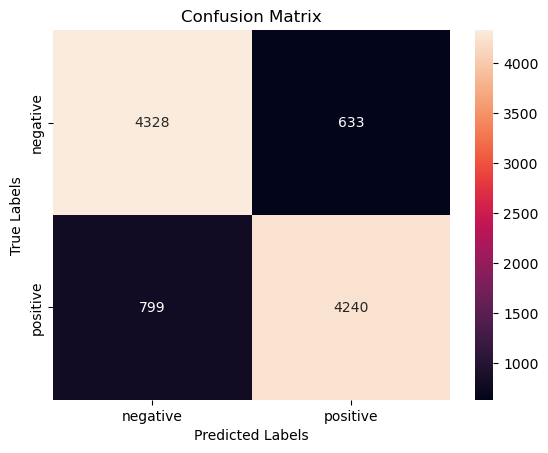

In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, multinomial_nb_pred)

# Display confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=multinomial_nb_model.classes_, yticklabels=multinomial_nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Compare classification reports
print("Multinomial Naive Bayes Classification Report:\n", classification_report(y_test, multinomial_nb_pred))

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4961
    positive       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



##### Bernoulli Naive Bayes

In [26]:
# Implement the model
bernoulli_nb_model = BernoulliNB()

# Fit the model
bernoulli_nb_model.fit(X_train, y_train)

# Make prediction
bernoulli_nb_pred = bernoulli_nb_model.predict(X_test)

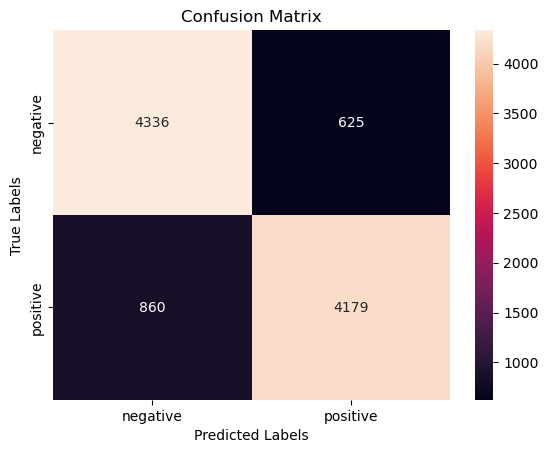

In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, bernoulli_nb_pred)

# Display confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=bernoulli_nb_model.classes_, yticklabels=bernoulli_nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Compare classification reports
print("\nBernoulli Naive Bayes Classification Report:\n", classification_report(y_test, bernoulli_nb_pred))


Bernoulli Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.87      0.85      4961
    positive       0.87      0.83      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



##### Gaussian Naive Bayes

In [39]:
from sklearn.decomposition import TruncatedSVD

# Apply CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=500)  # You can adjust the number of components based on available memory
X_svd = svd.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svd, df['sentiment'], test_size=0.2, random_state=42)

# Implement Gaussian Naive Bayes model
gaussian_nb_model = GaussianNB()

# Fit the model
gaussian_nb_model.fit(X_train, y_train)

# Make predictions
gaussian_nb_pred = gaussian_nb_model.predict(X_test)

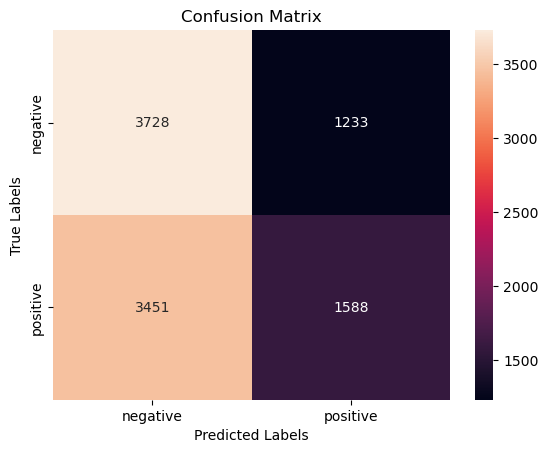

In [40]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, gaussian_nb_pred)

# Display confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=gaussian_nb_model.classes_, yticklabels=gaussian_nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Compare classification reports
print("\nGaussian Naive Bayes Classification Report:\n", classification_report(y_test, gaussian_nb_pred))


Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.52      0.75      0.61      4961
    positive       0.56      0.32      0.40      5039

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.51     10000
weighted avg       0.54      0.53      0.51     10000



### Model Evaluation on Multinomial NB Model

In [44]:
def preprocess_and_predict_sentiment(review):
    # Preprocess the given review
    review_lower = review.lower()
    review_no_html = BeautifulSoup(review_lower, 'html.parser').get_text()
    review_no_brackets = re.sub(r'\[.*?\]', '', review_no_html)
    review_no_special_chars = re.sub(r'[^A-Za-z0-9\s]', '', review_no_brackets)
    review_no_stopwords = ' '.join([word for word in review_no_special_chars.split() if word not in stop_words])
    review_stemmed = ' '.join([stemmer.stem(word) for word in review_no_stopwords.split()])

    # Vectorize the preprocessed review
    vectorized_review = vectorizer.transform([review_stemmed])

    # Predict sentiment using Multinomial Naive Bayes model
    prediction = multinomial_nb_model.predict(vectorized_review)

    return prediction

In [45]:
# Given review
given_review = "I saw this few days back. To be honest I wasn't even aware that such a movie existed. It was only when this was sent as an official entry from India n it was all ov the news, that I came to kno of its existence. Maybe the movie wasn't advertised or marketed well. It is such an awesome movie that I find it a crime that this movie wasn't known to me. The movie is about the 2018 Kerala floods n how people helped total strangers, showcasing that humanity exist specially in the southern states of India otherwise the cow belt n other regions in India are notorious for Christians, Muslims n Dalits persecutions. The background song is very touching n the background music is mesmerizing.The character Anoop will stay with u for a long time. So will the fisherman family n Nixon."

# Call the function
predicted_sentiment = preprocess_and_predict_sentiment(given_review)

print("Predicted Sentiment: ", predicted_sentiment)

Predicted Sentiment:  ['positive']


In [46]:
# Given review
given_review = "I recently watched this movie, and it was a complete disappointment. The storyline was confusing, and the characters were poorly developed. The acting was subpar, making it difficult to connect with any of the characters emotionally. The cinematography was lackluster, with uninspiring visuals and dull scenes. The pacing of the movie was off, making it feel dragged out and boring. Overall, it's one of the worst movies I've seen in a while, and I wouldn't recommend it to anyone."

# Call the function
predicted_sentiment = preprocess_and_predict_sentiment(given_review)

print("Predicted Sentiment: ", predicted_sentiment)

Predicted Sentiment:  ['negative']
